In [102]:
import pandas as pd
import matplotlib 
df = pd.read_json('../Data/academia3.json')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537 entries, 0 to 1536
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   votes          1537 non-null   int64 
 1   answers_count  1537 non-null   int64 
 2   closed         1537 non-null   bool  
 3   title          1537 non-null   object
 4   views          1537 non-null   int64 
 5   tags           1537 non-null   object
 6   asked          1535 non-null   object
 7   post_text      1537 non-null   object
 8   comments       1381 non-null   object
 9   answers        1537 non-null   object
dtypes: bool(1), int64(3), object(6)
memory usage: 109.7+ KB


In [103]:
df['asked'] = pd.to_datetime(df['asked'],utc= True)


In [104]:
mask =(df['asked'] < pd.to_datetime('2020-01-01 00:00Z', utc=True))
limited = df.loc[mask]

AttributeError: module 'matplotlib' has no attribute 'show'

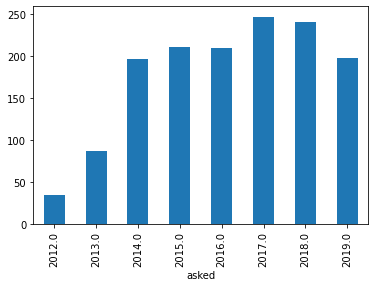

In [105]:
trend_of_questions = limited['title'].groupby([df.asked.dt.year]).agg('count')
trend_of_questions.plot(x='asked', y='answer_count', kind ='bar')
plt.show()

In [ ]:

m = limited['title'].groupby([df.asked.dt.month.rename('month')]).agg(count ='count')
m['count']/8


In [ ]:
data2020= df.loc[(df['asked'] > pd.to_datetime('2020-01-01 00:00Z', utc=True))]
data2020['title'].groupby([df.asked.dt.month.rename('month')]).agg(count = 'count')

In [113]:
import collections
all_tags = []
for a in df['tags']:
    all_tags += a

cnt = collections.Counter(all_tags)
cnt.most_common()

[('ethics', 1537),
 ('publications', 335),
 ('authorship', 143),
 ('peer-review', 121),
 ('plagiarism', 114),
 ('etiquette', 106),
 ('phd', 104),
 ('research-process', 100),
 ('advisor', 89),
 ('journals', 79),
 ('citations', 75),
 ('cheating', 65),
 ('conference', 65),
 ('teaching', 62),
 ('paper-submission', 52),
 ('exams', 51),
 ('thesis', 51),
 ('professors', 47),
 ('funding', 47),
 ('united-states', 46),
 ('graduate-admissions', 43),
 ('legal-issues', 43),
 ('conflict-of-interest', 42),
 ('collaboration', 39),
 ('undergraduate', 35),
 ('research-misconduct', 35),
 ('university', 35),
 ('postdocs', 34),
 ('data', 31),
 ('graduate-school', 31),
 ('job-search', 31),
 ('editors', 30),
 ('interpersonal-issues', 29),
 ('application', 28),
 ('recommendation-letter', 28),
 ('mathematics', 28),
 ('students', 27),
 ('self-plagiarism', 25),
 ('computer-science', 24),
 ('research-undergraduate', 23),
 ('irb', 22),
 ('supervision', 22),
 ('grading', 22),
 ('copyright', 22),
 ('teaching-assista

,votes,answers_count,closed,title,views,tags,asked,post_text,comments,answers
